In [46]:
import numpy as np
import pandas as pd
import cPickle as pickle
from IPython.display import display
from IPython.display import Image
import matplotlib
%matplotlib inline

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
def unpickle(filename_pickle):
    print 'unpickling:', filename_pickle, '...'
    return pickle.load(open(filename_pickle, 'rb'))

def pickleup(object_to_pickle, filename_pickle):
    print 'pickling:', filename_pickle,'...'
    pickle.dump(object_to_pickle, open(filename_pickle, 'wb'))

In [4]:
# aisles = pd.read_csv('raw_data/aisles.csv')
# departments = pd.read_csv('raw_data/departments.csv')
# products = pd.read_csv('raw_data/products.csv')
# order_products_train_df = pd.read_csv("raw_data/order_products__train.csv")
# order_products_prior_df = pd.read_csv("raw_data/order_products__prior.csv")
# orders = pd.read_csv("raw_data/orders.csv")

In [5]:
# pickleup(aisles, 'pickled_data/aisles.p')
# pickleup(departments, 'pickled_data/departments.p')
# pickleup(products, 'pickled_data/products.p')
# pickleup(order_products_train_df, 'pickled_data/order_products_train_df.p')
# pickleup(order_products_prior_df, 'pickled_data/order_products_prior_df.p')
# pickleup(orders, 'pickled_data/orders.p')

aisles = unpickle('pickled_data/aisles.p')
departments = unpickle('pickled_data/departments.p')
products = unpickle('pickled_data/products.p')
# unpickle('pickled_data/order_products_train_df.p')
# unpickle('pickled_data/order_products_prior_df.p')
orders = unpickle('pickled_data/orders.p')
# print 'finished!'

unpickling: pickled_data/aisles.p ...
unpickling: pickled_data/departments.p ...
unpickling: pickled_data/products.p ...
unpickling: pickled_data/orders.p ...


## Cleaning

In [59]:
products.product_name = products.product_name.str.replace("'", '')
products.product_name = products.product_name.str.replace(',', '')
products.product_name = products.product_name.str.replace(' ', '_')
aisles.aisle = aisles.aisle.str.replace(' ', '_')
departments.department = departments.department.str.replace(' ','_')

## Joins

In [68]:
new_train = pd.merge(order_products_train_df, orders, left_on='order_id', right_on='order_id', how='inner')
new_prior = pd.merge(order_products_prior_df, orders, left_on='order_id', right_on='order_id', how='inner')

In [11]:
new_products = pd.merge(products, aisles, left_on='aisle_id', right_on='aisle_id', how='left')
new_products = pd.merge(new_products, departments, left_on='department_id', right_on='department_id', how='left')

In [2]:
# pickleup(new_train, 'pickled_data/new_train.p')
# pickleup(new_prior, 'pickled_data/new_prior.p')
# pickleup(new_products, 'pickled_data/new_products.p')

new_train = unpickle('pickled_data/new_train.p')
new_prior = unpickle('pickled_data/new_prior.p')
new_products = unpickle('pickled_data/new_products.p')
print 'finished!'

unpickling: pickled_data/new_train.p ...
unpickling: pickled_data/new_prior.p ...
unpickling: pickled_data/new_products.p ...
finished!


## Exploration

In [7]:
print new_train.head()
print "-"*100
print orders.head()

   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         1       49302                  1          1   112108    train   
1         1       11109                  2          1   112108    train   
2         1       10246                  3          0   112108    train   
3         1       49683                  4          0   112108    train   
4         1       43633                  5          1   112108    train   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  
0             4          4                 10                     9.0  
1             4          4                 10                     9.0  
2             4          4                 10                     9.0  
3             4          4                 10                     9.0  
4             4          4                 10                     9.0  
----------------------------------------------------------------------------------------------------
   order_id  use

In [51]:
# order_products_train_df[order_products_train_df.user_id==10]
user_id_input = 10
user_orders = orders[orders.user_id==user_id_input].order_id.tolist()
print_full(order_products_train_df[order_products_prior_df.order_id.isin([user_orders])])

        order_id  product_id  add_to_cart_order  reordered
645758   1589147       29307                  8          1
645759   1589166       24852                  1          1
645760   1589166       33787                  2          1
645761   1589166       40571                  3          1
645762   1589166       33198                  4          0
645763   1589166        9741                  5          0
645764   1589166       14223                  6          1
645765   1589166       22395                  7          0
645766   1589166       17316                  8          1
645767   1589166       32784                  9          0
645768   1589166        1464                 10          1
645769   1589166       29553                 11          0
645770   1589166       44325                 12          1
645771   1589166        4605                 13          0
645772   1589166       28379                 14          0
645773   1589166        7116                 15         

/Users/matthew.negrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [7]:
aisles
departments
products
order_products_train_df.shape

(1384617, 4)

In [ ]:
orders

In [11]:
order_products_train_df.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [15]:
new_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [16]:
new_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [17]:
test_prior = new_prior.copy(deep=True)

In [19]:
new_test_prior = pd.merge(test_prior, new_products, left_on='product_id', right_on='product_id', how='left')

In [20]:
new_test_prior['product_list'] = new_test_prior[['order_id','product_name','user_id','order_number']].groupby(['user_id','order_id','order_number'])['product_name'].transform(lambda x: ','.join(x))

In [22]:
grouped_test_prior = test_prior.groupby(['user_id','order_id','order_number','order_dow','order_hour_of_day','days_since_prior_order']).agg({'reordered':sum,'add_to_cart_order': "max"})

In [23]:
grouped_test_prior

add_to_cart_order  \
user_id order_id order_number order_dow order_hour_of_day days_since_prior_order                      
1       431534   5            4         15                28.0                                    8   
        473747   3            3         12                21.0                                    5   
        550135   7            1         9                 20.0                                    5   
        2254736  4            4         7                 29.0                                    5   
        2295261  9            1         16                0.0                                     6   
        2398795  2            3         7                 15.0                                    6   
        2550362  10           4         8                 30.0                                    9   
        3108588  8            1         14                14.0                                    6   
        3367565  6            2         7                 19.0                                    4   
2       738281   4            2         10                8.0                                    13   
        788338   8            1         15                27.0                                   16   
        839880   14           3         10                13.0                                   16   
        1199898  6            2         9                 13.0                                   21   
        1402090  11           1         10                30.0                                   15   
        1447487  10           1         11                6.0                                     9   
        1501582  2            5         10                10.0                                    6   
        1673511  5            3         11                8.0                                    13   
        1718559  9            2         9                 8.0                                    26   
        1901567  3            1         10                3.0                                     5   
        3186735  12           1         9                 28.0                                   19   
        3194192  7            2         12                14.0                                   14   
        3268552  13           4         11                30.0                                    9   
3       444309   2            3         19                9.0                                     9   
        521107   11           0         18                11.0                                    5   
        676467   10           3         16                17.0                                    6   
        1402502  12           1         15                15.0                                    6   
        1839752  7            0         15                7.0                                     9   
        1972919  6            0         16                7.0                                     8   
        2037211  4            2         18                20.0                                    5   
        2710558  5            0         17                12.0                                   11   
...                                                                                             ...   
206208  2573371  24           5         9                 7.0                                    14   
        2675140  42           1         19                6.0                                     9   
        2789700  35           3         22                4.0                                    16   
        2804556  25           2         15                11.0                                   16   
        2808240  38           0         15                19.0                                    8   
        2922221  22           1         12                3.0                                     8   
        2936891  5            1         10                5.0    

### Market Basket Analysis

In [9]:
tdf = new_train.copy(deep=True)

In [10]:
tdf = tdf[0:10000]

In [22]:
tdf.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [40]:
odf = tdf.pivot(index='order_id', columns='product_id', values='order_hour_of_day')
odf = odf.fillna(0)
# odf = odf.apply(lambda x: x**0 if x > 0 else x)
for col in odf.columns:
    odf[col] = odf[col].apply(lambda x: 1 if x > 0 else x)

In [42]:
odf.head(2)
len(odf.columns)

4660

In [58]:
odf_matrix = odf.as_matrix()
rows, columns = odf_matrix.shape
frequent_items_matrix = np.zeros((columns,columns))

In [ ]:
for this_column in range(0, columns-1):
    for next_column in range(this_column + 1, columns):
        product_vector = odf_matrix[:,this_column] * odf_matrix[:,next_column]
        count_matches = sum((product_vector)>0)
        frequent_items_matrix[this_column,next_column] = count_matches
        
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = odf.columns.values, index = odf.columns.values)
 

#### market basket paper
https://dzenanhamzic.com/2017/01/19/market-basket-analysis-mining-frequent-pairs-in-python/

In [43]:
transaction_df = pd.DataFrame({'Beer' : [1,0,1,0,1,0,0,1],
                               'Coke' : [0,1,1,0,1,0,0,1],
                               'Pepsi' : [1,0,0,1,0,0,1,0],
                               'Milk' : [0,1,0,1,1,1,0,1],
                               'Juice' : [0,0,1,0,0,1,1,1]})

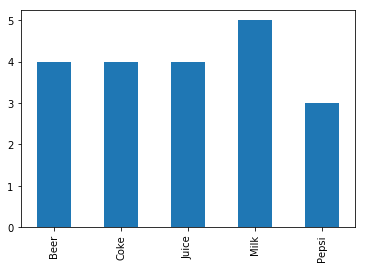

In [47]:
product_support_dict = {}
for column in transaction_df.columns:
    product_support_dict[column] = sum(transaction_df[column]>0)
 
pd.Series(product_support_dict).plot(kind="bar")

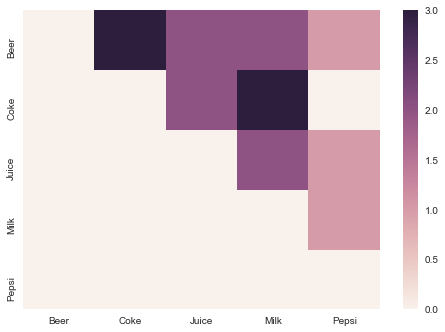

In [51]:
# take data matrix from dataframe
transaction_matrix = transaction_df.as_matrix()
# get number of rows and columns
rows, columns = transaction_matrix.shape
# init new matrix
frequent_items_matrix = np.zeros((5,5))
# compare every product with every other
for this_column in range(0, columns-1):
    for next_column in range(this_column + 1, columns):
        # multiply product pair vectors
        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        # check the number of pair occurrences in baskets
        count_matches = sum((product_vector)>0)
        # save values to new matrix
        frequent_items_matrix[this_column,next_column] = count_matches
        
# and finally combine product names with data
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = transaction_df.columns.values, index = transaction_df.columns.values)
 
import seaborn as sns
# and plot
sns.heatmap(frequent_items_df)

In [52]:
# extract product pairs with minimum frequency(treshold) basket occurrences
def extract_pairs(treshold):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequent_items_matrix >= treshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get product names
        first_product = product_names[row]
        second_product = product_names[column]
        # number of basket matches
        matches = frequent_items_matrix[row,column]
        # put key values into dict
        output[first_product+"-"+second_product] = matches
 
    # return sorted dict
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output
 
# plot pairs with minimum frequency of 1 basket matches
pd.Series(extract_pairs(1)).plot(kind="barh")

NameError: global name 'product_names' is not defined